# Description 

**Finding the best neighborhood where Pennywise from IT would be able to succeed in luring the most children. Our measure of "worstness" is if the area does not allow for Pennywise to capture and eat children. In contrast, our measure of "greatness" is if the neigbourhood has a well connected sewer system, with a good amount of children present to snatch.**

**There are three components that make up this metric, firstly: Are the sewers well connected? As this is how he travels the city without being seen. Secondly: Are there large water bodies where he can reside and bide his time and lastly: where is there a high concentration of easy to manipulate children.**

--------------------------------------------

# Dataset: Enrollment by School and Neighborhood 2020-21


Creator of this notebook: Ifeoluwa Olusoga
------------------------------------------
 
**Since we are finding the best neighborhood where pennywise could successful lure in children.. lets take a look at some of the schools in Pittsburgh!**

**I will determine the best and worst neighborhoods for pennywise by the amount of students enrolled in each school then add up the total enrollment from all schools in each neighborhood.**

**The database I am using had different metrics to judge the schools off of which were: race, iep, feeder schools, and enrolled students but pennywise doesnt discriminate so I selected enrolled students and that is what I will be analyzying in this notebook!**

----------------------------------------------------------------

# Plotting the Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
PGH_schools = pd.read_csv("https://data.wprdc.org/datastore/dump/7b0660d1-c812-496d-ab0a-8560902e9e70")
PGH_schools

,_id,neighborhood,school,enrolled_students
0,1,Allegheny Center,Other,50
1,2,Allegheny Center,PITTSBURGH KING PreK-8,34
2,3,Allentown,Other,96
3,4,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,5,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
...,...,...,...,...
501,502,Wilkinsburg Borough,Other,72
502,503,Windgap,Other,50
503,504,Windgap,PITTSBURGH WESTWOOD K-5,29
504,505,Windgap,PITTSBURGH BRASHEAR HIGH SCHOOL,19


Top 20 and Bottom 20 Schools
-----------------
**Boom, look at all that beautiful data BUT all of it is not relevant so we are going to get the top 20 schools with the most kiddies enrolled.**

In [3]:
top_20_schools= PGH_schools.sort_values(by='enrolled_students', ascending=False)
t20=top_20_schools.head(20)
t20

,_id,neighborhood,school,enrolled_students
69,70,Brookline,PITTSBURGH BROOKLINE PreK-8,394
447,448,Squirrel Hill South,PITTSBURGH COLFAX K-8,307
408,409,Sheraden,PITTSBURGH LANGLEY K-8,273
89,90,Carrick,PITTSBURGH CONCORD K-5,268
203,204,Greenfield,PITTSBURGH GREENFIELD PreK-8,233
500,501,Wilkinsburg Borough,PITTSBURGH WESTINGHOUSE ACADEMY 6-12,233
90,91,Carrick,PITTSBURGH CARRICK HIGH SCHOOL,228
26,27,Beechview,PITTSBURGH BEECHWOOD PreK-5,225
58,59,Brighton Heights,PITTSBURGH MORROW PreK-8,218
448,449,Squirrel Hill South,PITTSBURGH ALLDERDICE HIGH SCHOOL,192


**Wow would you look at that... by a quick glance pennywise would love it at Carrick but lets look at the bottom 20 schools.**

In [4]:
bottom_20_schools= PGH_schools.sort_values(by='enrolled_students', ascending=True)
b20=bottom_20_schools.head(20)
b20

,_id,neighborhood,school,enrolled_students
110,111,Central Lawrenceville,PITTSBURGH SCIENCE AND TECHNOLOGY ACADEMY,11
233,234,Highland Park,PITTSBURGH LIBERTY K-5,11
25,26,Bedford Dwellings,PITTSBURGH CLASSICAL 6-8,11
105,106,Carrick,PITTSBURGH ONLINE ACADEMY,11
272,273,Knoxville,PITTSBURGH CAPA 6-12,11
273,274,Knoxville,PITTSBURGH OLIVER CITYWIDE ACADEMY,11
433,434,South Side Slopes,PITTSBURGH GRANDVIEW PreK-5,11
274,275,Knoxville,PITTSBURGH STUDENT ACHIEVEMENT CENTER 6-12,11
281,282,Larimer,PITTSBURGH LINDEN K-5,11
282,283,Larimer,PITTSBURGH STERRETT 6-8,11


**Awesome. but the font and layout are very ugly so i'm going to organize both of those into descending order again and add some labels so its easier to read!**

In [5]:
top20_repeats= t20.value_counts('neighborhood').rename_axis('neighborhood').reset_index(name='count')
top20_repeats

,neighborhood,count
0,Carrick,4
1,Beechview,2
2,Brookline,2
3,Squirrel Hill South,2
4,Brighton Heights,1
5,Greenfield,1
6,Hazelwood,1
7,Homewood North,1
8,Marshall-Shadeland,1
9,Northview Heights,1


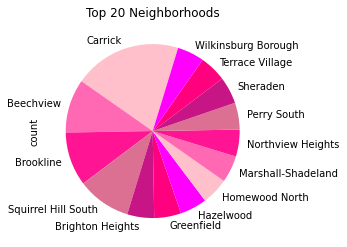

In [6]:
pink_shades = ['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FF007F', '#FF00FF']

top20_repeats.plot.pie(y='count', labels=top20_repeats['neighborhood'], startangle=73, legend=False, colors=pink_shades)
plt.title('Top 20 Neighborhoods')

plt.show()

In [7]:
bottom20_repeats= b20.value_counts('neighborhood').rename_axis('neighborhood').reset_index(name='count')
bottom20_repeats

,neighborhood,count
0,Sheraden,4
1,Knoxville,3
2,Larimer,2
3,Bedford Dwellings,1
4,Bon Air,1
5,Carrick,1
6,Central Lawrenceville,1
7,Hazelwood,1
8,Highland Park,1
9,Marshall-Shadeland,1


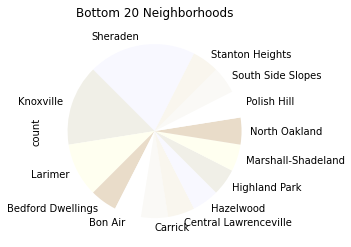

In [8]:
white_shades = ['#F8F8FF', '#F0EFE7', '#FFFFF0', '#E9DCC9', '#FFFFFF', '#FAF9F6', '#F9F6EE']

bottom20_repeats.plot.pie(y='count', labels=bottom20_repeats['neighborhood'], startangle=63, legend=False, colors=white_shades)
plt.title('Bottom 20 Neighborhoods')

plt.show()

# Total Enrolled Students <3

**Nice. lets add a cute graph of all the neighborhoods and their total enrolled students!!1 <3**

           neighborhood  total_enrolled_students
3               Carrick                      840
0             Brookline                      558
1   Squirrel Hill South                      499
6             Beechview                      391
2              Sheraden                      273
4            Greenfield                      233
5   Wilkinsburg Borough                      233
7      Brighton Heights                      218
8    Marshall-Shadeland                      188
9        Homewood North                      177
10    Northview Heights                      160
11      Terrace Village                      159
12            Hazelwood                      146
13          Perry South                      144


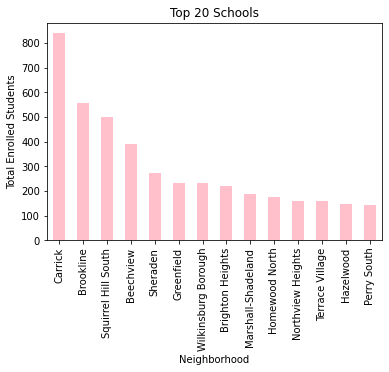

In [9]:
dict={}
for index, row in t20.iterrows():
    neighborhood= row['neighborhood']
    enrolled_students= row['enrolled_students']
    
    if neighborhood in dict:
        dict[neighborhood]+=enrolled_students
    else:
        dict[neighborhood]= enrolled_students
        
data = pd.DataFrame(list(dict.items()), columns=['neighborhood', 'total_enrolled_students'])
data = data.sort_values(by='total_enrolled_students', ascending=False)
print(data.head(20))

ax = data.plot.bar(x='neighborhood', y='total_enrolled_students', color='pink', legend=False)

plt.xlabel('Neighborhood')
plt.ylabel('Total Enrolled Students')
plt.title('Top 20 Schools')

plt.show()

**Niceeeeeee**

             neighborhood  total_enrolled_students
7                Sheraden                       44
4               Knoxville                       33
6                 Larimer                       22
0   Central Lawrenceville                       11
1           Highland Park                       11
2       Bedford Dwellings                       11
3                 Carrick                       11
5       South Side Slopes                       11
8             Polish Hill                       11
9      Marshall-Shadeland                       11
10          North Oakland                       11
11                Bon Air                       11
12              Hazelwood                       11
13        Stanton Heights                       11


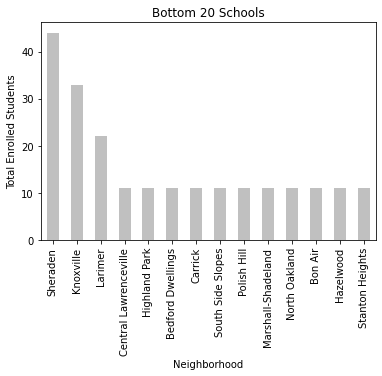

In [10]:
dict={}
for index, row in b20.iterrows():
    neighborhood= row['neighborhood']
    enrolled_students= row['enrolled_students']
    
    if neighborhood in dict:
        dict[neighborhood]+=enrolled_students
    else:
        dict[neighborhood]= enrolled_students
        
data = pd.DataFrame(list(dict.items()), columns=['neighborhood', 'total_enrolled_students'])
data = data.sort_values(by='total_enrolled_students', ascending=False)
print(data.head(20))

ax = data.plot.bar(x='neighborhood', y='total_enrolled_students', color='silver', legend=False)

plt.xlabel('Neighborhood')
plt.ylabel('Total Enrolled Students')
plt.title('Bottom 20 Schools')

plt.show()

# Conclusion

**So the BEST neighborhood for pennywise to lure in the most children is Carrick!! yay**

**and the worst neighborhood for pennywise to lure in children could be multiple neighborhoods but I'll just say Bon Air because not only do they only have 11 enrolled students but its a high school too which makes the students less susceptible to kidnapping.**

----------------------------------------------------------

# The Sewer System

**Our team aims to find the best area where Pennywise from IT would be able to succeed in luring the most children. This notebook will help us evaluate the amount of sewer systems in Pittsburgh, knowing these areas would help us find out which neighborhood has a well connected system where there are children nearby to see if Pennywise would more than likely be in that location.**

In [11]:
# Loading Pandas 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Here are the 10 entries that we get from the data set:**

In [12]:
tsv_file = "Basin.tsv"
df1 = pd.read_csv(tsv_file, sep="\t")
df1.head(10)

,_id,fid,perimeter,poly,subclass,subclass_,basin,symbol,direction,shape_length,shape_area
0,1090,1,161330.9100,1,BASIN,5,Lower Ohio River,17,north,0.513314,0.006315
1,1091,2,113386.4000,2,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,north,0.368109,0.003316
2,1092,3,147009.8000,3,BASIN,2,Lower Northern Allegheny River,23,north,0.463225,0.003780
3,1093,4,103578.0000,4,BASIN,3,Upper Allegheny River,57,north,0.329912,0.004036
4,1094,5,53398.6990,5,BASIN,5,Lower Ohio River,17,north,0.184703,0.000365
5,1095,6,349470.8100,6,BASIN,4,Chartiers Creek,25,south,1.123562,0.026668
6,1096,7,92945.4690,7,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,north,0.293921,0.002346
7,1097,8,6792.2939,8,BASIN,5,Lower Ohio River,17,north,0.023594,0.000017
8,1098,9,130340.8000,9,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,east,0.418928,0.004624
9,1099,10,242297.9100,10,BASIN,7,Thompson Run/Turtle Creek,19,east,0.772217,0.016991


**Using this information we can now narrow down the areas in which it would be easier/faster for Pennywise to travel. The smaller sizes would be considered.**

In [13]:

basin_threshold = 0.368109
# basins with area greater than or equal to 0.368109 

df1['Size'] = 'Huge'
df1.loc[df1['shape_length'] >= basin_threshold, 'Size'] = 'Small'

# Sort 'shape_length' in from greatest to least
# filter out rows where 'fid' is higher than 10
filterd = df1.sort_values(by='shape_length', ascending=False).loc[(df1['fid'] <= 10) ]
print(filterd[['basin', 'shape_length', 'Size']])

                                 basin  shape_length   Size
5                      Chartiers Creek      1.123562  Small
9            Thompson Run/Turtle Creek      0.772217  Small
0                     Lower Ohio River      0.513314  Small
2       Lower Northern Allegheny River      0.463225  Small
8  Upper Ohio/Allegheny/Monongahela Ri      0.418928  Small
1  Upper Ohio/Allegheny/Monongahela Ri      0.368109   Huge
3                Upper Allegheny River      0.329912   Huge
6  Upper Ohio/Allegheny/Monongahela Ri      0.293921   Huge
4                     Lower Ohio River      0.184703   Huge
7                     Lower Ohio River      0.023594   Huge


**Based on research the Chartiers Creek is the smallest length and Lower Ohio River would be the largest, this is going in descending order.**

**Now we'd use the information and research known to categorize what people would be doing in these ares and would it be a child friendly activity and if Pennyswise would want to be in this area:**

In [14]:
categories = {
'Thompson Run/Turtle Creek': 'Field trips',
    'Chartiers Creek': 'Fishing',
    'Upper Ohio/Allegheny/Monongahela Ri': 'Fishing',
    'Lower Ohio River' : 'Too far',  
    'Lower Northern Allegheny River': 'Too far'
}

# Create a new column 'Category' and assign categories based on basin names
df1['Category'] = df1['basin'].map(categories).fillna('Unknown')
basint = 0.368109  

# assign categories based on basin area
df1['Size'] = 'Huge'
df1.loc[df1['shape_length'] >= basint, 'Size'] = 'Small'

# show only rows where 'Size' is 'Small'
filtered_df = df1[(df1['fid'] <= 10) & (df1['Size'] == 'Small')]

# Display the DataFrame with the new 'Category' and 'Size' columns
print(filtered_df[['basin', 'Category', 'Size']])


                                 basin     Category   Size
0                     Lower Ohio River      Too far  Small
2       Lower Northern Allegheny River      Too far  Small
5                      Chartiers Creek      Fishing  Small
8  Upper Ohio/Allegheny/Monongahela Ri      Fishing  Small
9            Thompson Run/Turtle Creek  Field trips  Small


**Here's a graph showing the results:**

                                 basin     Category   Size
0                     Lower Ohio River      Too far  Small
2       Lower Northern Allegheny River      Too far  Small
5                      Chartiers Creek      Fishing  Small
8  Upper Ohio/Allegheny/Monongahela Ri      Fishing  Small
9            Thompson Run/Turtle Creek  Field trips  Small


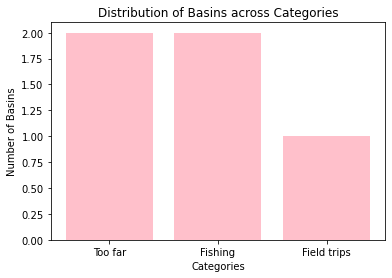

In [15]:
categories = {
    'Thompson Run/Turtle Creek': 'Field trips',
    'Chartiers Creek': 'Fishing',
    'Upper Ohio/Allegheny/Monongahela Ri': 'Fishing',
    'Lower Ohio River': 'Too far',
    'Lower Northern Allegheny River': 'Too far'
}

# Display the DataFrame with the new 'Category' and 'Size' columns
print(filtered_df[['basin', 'Category', 'Size']])

categoryc = filtered_df['Category'].value_counts()

plt.bar(categoryc.index, categoryc.values, color='pink')
plt.xlabel('Categories')
plt.ylabel('Number of Basins')
plt.title('Distribution of Basins across Categories')
plt.show()

-------------------------

# How can Pennywise utilize the Allegheny County Hydrology Lines?

![Pennwise](https://media.giphy.com/media/XyAGm96eUIPsc/giphy.gif) 

**Firstly, lets import all of our data manipulating materials.**

In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

**Next, we have to download our data file that contains information about the hydrology system, which contains photogrammetrically compiled water drainage features and structures including rivers, streams, drainage canals, locks, dams, lakes, ponds, reservoirs and mooring cells. Rivers, Lakes, Ponds, Reservoirs, Hidden Lakes, Reservoirs or Ponds.** 

In [10]:
ACHL = pd.read_csv('Allegheny County Hydrology Lines.csv')
ACHL.head()

,_id,fid,featurecod,update_year,shape_length
0,1234135,1,520,2004,0.002019
1,1234136,2,540,2004,0.000269
2,1234137,3,520,2004,0.001035
3,1234138,4,540,2004,0.000675
4,1234139,5,520,2004,0.000091


Let's categorize the different types water features. The data dictionary [provided](https://docs.google.com/spreadsheets/d/16BWrRkoPtq2ANRkrbG7CrfQk2dUsWRiaS2Ee1mTn7l0/edit#gid=699748293) with this data set categorizes each "featurecod". 

| **Code** | **Classification** |
| :---: | :---:|
|400 |Uncoded Water Bodies|
|410|lakes|
|420|Ponds
430|Reservoirs 
440|Hidden Lakes, Reserviors, or Ponds
450|Major Rivers
460|Rivers
470|Islands
410|lakes
420|Ponds
430|Reservoirs 
500|Uncoded Drainage
510|Rivers
520|Streams
530|Drainage Canals
540|Hidden Streams
550|Lock
560|Dams
580|Hidden River
590|Hidden Drainage Canal or Culvert

**Let us check if all of these classifiers are present in this dataset**

In [11]:
print(ACHL["featurecod"].unique())

[ 520  540  430  410  420  510  470  580 1510  530  590  460    0  500
  440]


**We are now understanding the variety of classifications of water resevoirs in Allegheny. We can now see the quantity of each classification!**

In [12]:
ACHL.groupby("featurecod").count().loc[:,"_id"]

featurecod
0           3
410        41
420       129
430       596
440         4
460       117
470         9
500         1
510       339
520     17715
530        27
540      7610
580       224
590         2
1510        1
Name: _id, dtype: int64

**Here we are droppping the classification of hydrology lines that do not serve a great purpose for Pennywise. this includes large rivers or dams which would not allow great cover for Pennywise to murder children.** 

In [13]:
# List of values to exclude
exclude_values = [400, 410, 450, 500, 530, 540, 590]

# Drop rows where 'featurecod' is in the exclude_values list
required_values1 = ACHL.drop(ACHL[ACHL['featurecod'].isin(exclude_values)].index)

print(required_values1)

           _id    fid  featurecod  update_year  shape_length
0      1234135      1         520         2004      0.002019
2      1234137      3         520         2004      0.001035
4      1234139      5         520         2004      0.000091
5      1234140      6         520         2004      0.000288
7      1234142      8         520         2004      0.002785
...        ...    ...         ...          ...           ...
26810  1260945  26812         520         2004      0.000330
26812  1260947  26814         520         2004      0.009509
26814  1260949  26816         430         2004      0.001364
26815  1260950  26817         430         2004      0.001424
26816  1260951  26818         520         2004      0.000308

[19137 rows x 5 columns]


**We can infer that it would be benefical for the system to have around 50-250 areas. This is to ensure that Pennywise is hidden yet he will not get lost in the area. From the informaiton we get above, we can see that there is around 17715 systems of streams. This would be very useless for Pennywise as it can get incredibily confusing for him to keep track. Furthermore, we can exclude, features 0, 430, 440, 470, 510, 520 and 1510. Lets drop these values.** 

In [14]:
# List of values to exclude
final_exclude_values = [400, 410, 450, 500, 530, 540, 590, 0, 430, 440, 470, 510, 520, 1510]

# Drop rows where 'featurecod' is in the exclude_values list
required_values2 = ACHL.drop(ACHL[ACHL['featurecod'].isin(final_exclude_values)].index)

print(required_values2)

           _id    fid  featurecod  update_year  shape_length
143    1234278    144         420         2004      0.001118
165    1234300    166         420         2004      0.000020
171    1234306    172         420         2004      0.000710
183    1234318    184         420         2004      0.000752
185    1234320    186         420         2004      0.002355
...        ...    ...         ...          ...           ...
26690  1260825  26692         420         2004      0.000589
26706  1260841  26708         420         2004      0.000563
26713  1260848  26715         420         2004      0.000686
26749  1260884  26751         420         2004      0.003324
26778  1260913  26780         460         2004      0.020956

[470 rows x 5 columns]


**Now looking at this data we can infer that the wanted featurecod values are 420, 460, 580 which are Ponds, Rivers and Hidden Rivers respectively**

In [15]:
required_values2.head()
required_values2.groupby("featurecod").count().loc[:,"_id"]

featurecod
420    129
460    117
580    224
Name: _id, dtype: int64

# Mapping out the hydrology lines on Pittsburgh
---------------------------------------------------------
**Now in order to do the following, we need to import some packages which will allow us to utilize the shapefile we downloaded and visualize the structure of these hydrology lines. Seaborn provides a high-level interface for drawing attractive and informative statistical graphic. And pyshp will let us read the shapefile**

In [16]:
import shapefile as shp
import seaborn as sns

**Let us read the shapefile**

In [17]:
shp_path = "Allegheny Hydrology Lines Shapefile/Hydrology_Lines.shp"
sf = shp.Reader(shp_path)

**To ensure that the data from the shapefile holds the same values to the csv, let us read how many data points have been provided. If they are the same it should give us an output of 26818**

In [18]:
len(sf.shapes())

26818

**Now in order to use geopandas, we need to convert this shapefile into a pandas dataframe**

In [19]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [20]:
df = read_shapefile(sf)
df.shape

(26818, 6)

**Let's check out these data points!**

In [21]:
map_df = gpd.read_file(shp_path)
map_df.head()

,FID,FEATURECOD,UPDATE_YEA,GlobalID,SHAPE_Leng,geometry
0,1,520,2004,{516E79A9-A169-4C32-B0A7-32C491B9DDBB},0.002019,"LINESTRING (-80.23364 40.56967, -80.23376 40.5..."
1,2,540,2004,{4E07A9F5-6FCE-4649-AFC0-EB003F7E31C9},0.000269,"LINESTRING (-80.23548 40.56838, -80.23523 40.5..."
2,3,520,2004,{00349E96-4457-4F54-9E2B-2E47CC35C75A},0.001035,"LINESTRING (-80.24235 40.56769, -80.24234 40.5..."
3,4,540,2004,{619B4485-18C1-487A-B25E-88B94BC9EA05},0.000675,"LINESTRING (-80.24272 40.56713, -80.24235 40.5..."
4,5,520,2004,{992E135A-D6E2-433A-8084-0797A96B8242},0.000091,"LINESTRING (-80.24274 40.56688, -80.24265 40.5..."


**Now we can properly plot this map to show the Hydrology Lines**

([], <a list of 0 Text major ticklabel objects>)

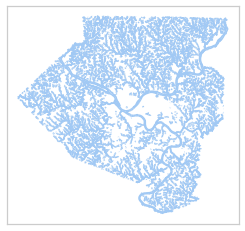

In [32]:
map_df.plot()

# Excluding the x and y axis labels 

plt.xticks([])
plt.yticks([])

**Now using the required_values we had previously sorted, we can plot the data to show only the map of only the Ponds, Rivers and Hidden Rivers**

([], <a list of 0 Text major ticklabel objects>)

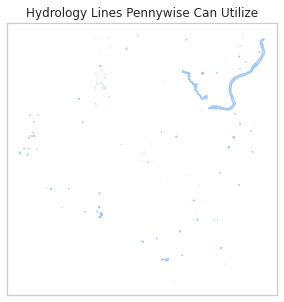

In [38]:
# List of values to exclude
map_exclude_values = [400, 410, 450, 500, 530, 540, 590, 0, 430, 440, 470, 510, 520, 1510]

# Drop rows where 'featurecod' is in the exclude_values list
required_values3 = map_df.drop(map_df[map_df['FEATURECOD'].isin(map_exclude_values)].index)

required_values3.plot(figsize=(5, 5))

# Adding a title

plt.title('Hydrology Lines Pennywise Can Utilize')

# Excluding the x and y labels

plt.xticks([])
plt.yticks([])

**From the above map we can see that the area that is well connected is in the top right quadrant. Further research shows that this is a culmination of 420 and 580 which are 'rivers' and 'hidden rivers'.**
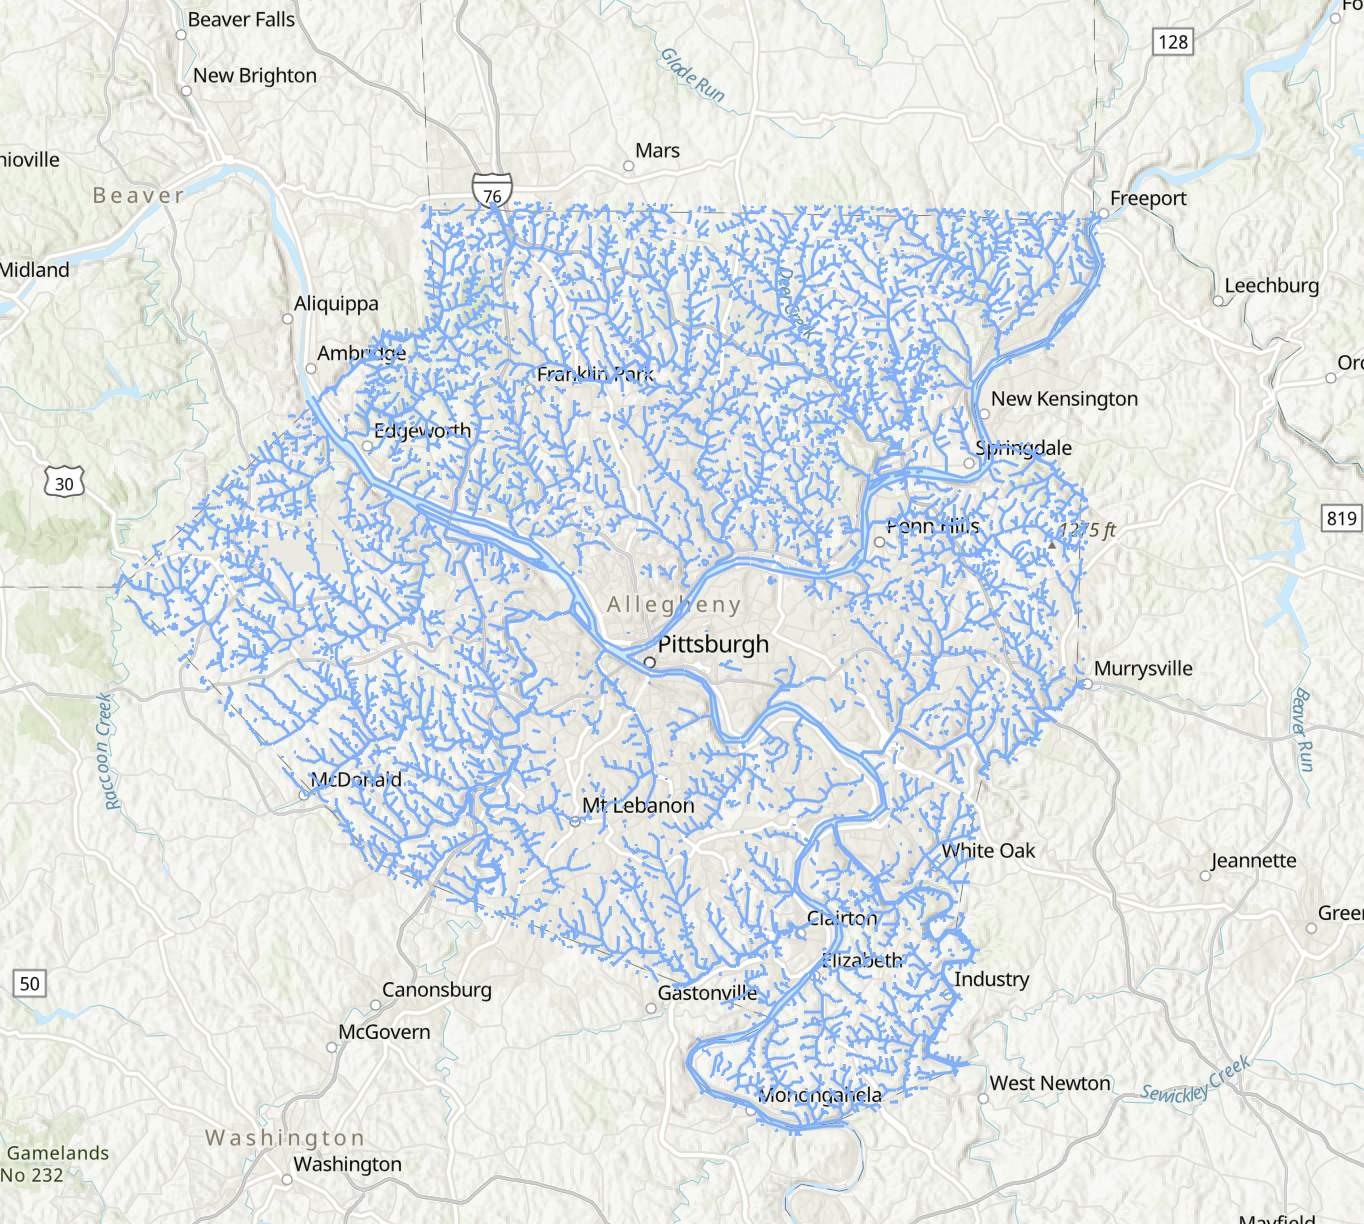

# Conclusion

**To discern from this map, we can understand that the best neigbourhood for Pennywise would be New Kensington as it falls in the top right quadrant of the map**

---------------------------------------------------